# Kickstarter Projects: Success or Bust?

Kickstarter is an online platform where users can help bring “creative projects to life” by donating to projects as they wish. As of 2019, there have been 445,000 projects in categories ranging from music, video games, stage shows and technology. Kickstarter allows unique projects and personal dreams to come into fruition. However, many projects do not get completed and donors can feel like they wasted their money. 


**Objective:** Utilize past data to predict whether a Kickstarter project will meet its initial donation goal.

1. Data Cleaning
    * Null values
    * Erroneous Values
2. Exploratory Data Analysis
    * Visualizing dataset
    * Correlations    
3. **Data Preprocessing**
    * **Scale numerical features**
    * **One-hot encode categorical features**
    * **train_test_split dataset**    
4. Modeling
    * Decision Tree/Random Forest Classifiers
    * Gradient Boosting Classifier
    * K-Nearest Neighbors Classifier
    * Hyperparameter Tuning

This project uses the dataset from the Kaggle dataset "Kickstarter Projects" found [here.](https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv)

### Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

### Investigating dataset

In [2]:
df = pd.read_csv('data/after_eda.csv', index_col = 0)
df.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days_until_deadline,percent_achieved_real
0,Poetry,Publishing,GBP,2015-10-09 00:00:00,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,58,0.000000
1,Narrative Film,Film & Video,USD,2017-11-01 00:00:00,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,59,8.070000
2,Narrative Film,Film & Video,USD,2013-02-26 00:00:00,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,44,0.488889
3,Music,Music,USD,2012-04-16 00:00:00,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,29,0.020000
4,Film & Video,Film & Video,USD,2015-08-29 00:00:00,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,55,6.579487


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370454 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   category               370454 non-null  object 
 1   main_category          370454 non-null  object 
 2   currency               370454 non-null  object 
 3   deadline               370454 non-null  object 
 4   goal                   370454 non-null  float64
 5   launched               370454 non-null  object 
 6   pledged                370454 non-null  float64
 7   state                  370454 non-null  int64  
 8   backers                370454 non-null  int64  
 9   country                370454 non-null  object 
 10  usd pledged            370454 non-null  float64
 11  usd_pledged_real       370454 non-null  float64
 12  usd_goal_real          370454 non-null  float64
 13  days_until_deadline    370454 non-null  int64  
 14  percent_achieved_real  370454 non-nu

In [4]:
# DROP df['percent_achieved_real']
df.drop('percent_achieved_real', axis = 1, inplace = True)

### Tasks:
1. Scale numerical columns
2. Categorical encoding for non-numerical columns

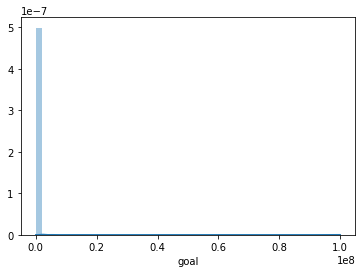

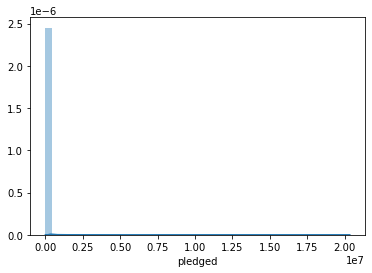

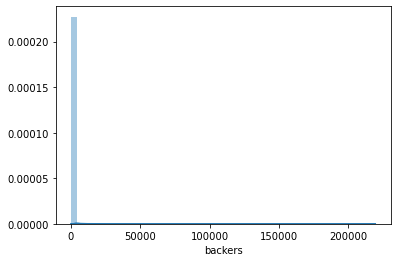

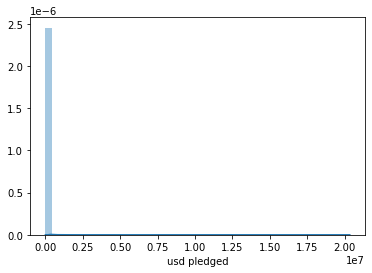

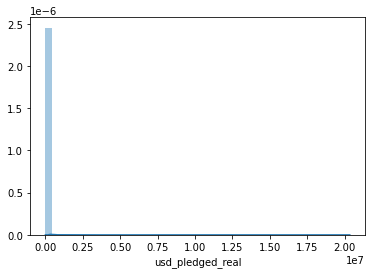

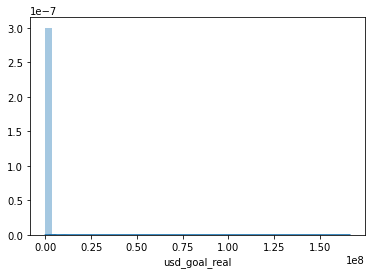

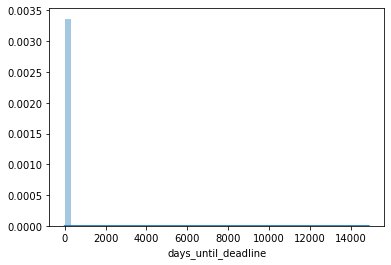

In [5]:
numerical_cols = list(df.select_dtypes(['float64', 'int64']).drop('state', axis = 1).columns)

for col in numerical_cols:
    sns.distplot(df[col])
    plt.show()

All of the numerical features (except for `state`) are heavily right skewed, which leaves me with two options of handling these features. I could either remove the extreme outliers or log-scale these features. I will try both methods to see what sort of distribution is obtained at the end.

### Removing outliers

In [6]:
from scipy import stats

z_score = abs(stats.zscore(df.select_dtypes(['int64', 'float64']).drop('state', axis = 1)))
df_no_outliers = df[(z_score < 3).all(axis = 1)]
df_no_outliers.shape

(367528, 14)

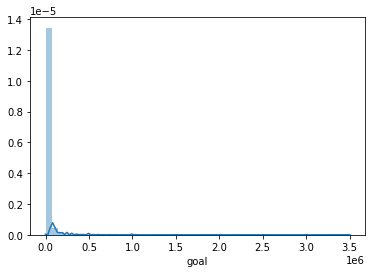

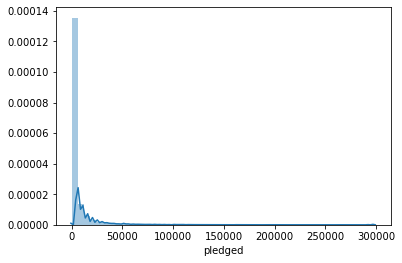

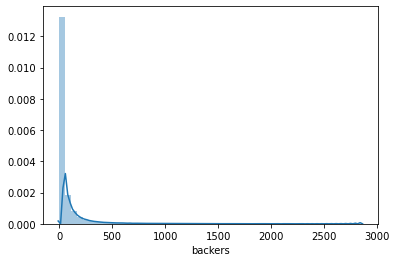

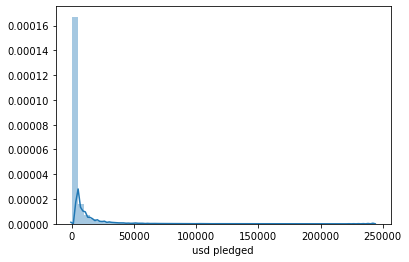

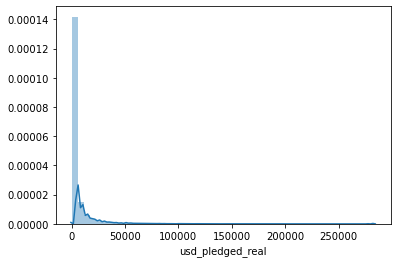

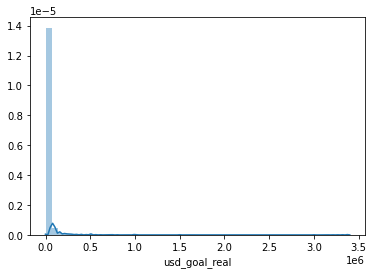

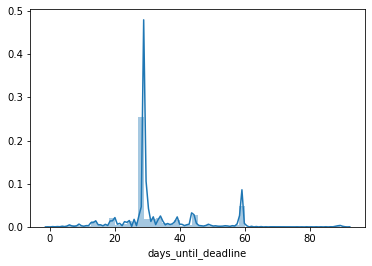

In [7]:
for col in numerical_cols:
    sns.distplot(df_no_outliers[col])
    plt.show()

Even after excluding the outliers, the distribution of the columns are very heavily right skewed. Because of this the numbers will be scaled using log transformation to obtain a more normal distribution

In [8]:
for col in numerical_cols:
    df_no_outliers[col] = np.log1p(df_no_outliers[col])

<ipython-input-8-78b0ec081650>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = np.log1p(df_no_outliers[col])


In [9]:
df_no_outliers

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days_until_deadline
0,Poetry,Publishing,GBP,2015-10-09 00:00:00,6.908755,2015-08-11 12:12:28,0.000000,0,0.000000,GB,0.000000,0.000000,7.336253,4.077537
1,Narrative Film,Film & Video,USD,2017-11-01 00:00:00,10.308986,2017-09-02 04:43:57,7.792349,0,2.772589,US,4.615121,7.792349,10.308986,4.094345
2,Narrative Film,Film & Video,USD,2013-02-26 00:00:00,10.714440,2013-01-12 00:20:50,5.398163,0,1.386294,US,5.398163,5.398163,10.714440,3.806662
3,Music,Music,USD,2012-04-16 00:00:00,8.517393,2012-03-17 03:24:11,0.693147,0,0.693147,US,0.693147,0.693147,8.517393,3.401197
4,Film & Video,Film & Video,USD,2015-08-29 00:00:00,9.878221,2015-07-04 08:35:03,7.157735,0,2.708050,US,7.157735,7.157735,9.878221,4.025352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,Documentary,Film & Video,USD,2014-10-17 00:00:00,10.819798,2014-09-17 02:35:30,3.258097,0,0.693147,US,3.258097,3.258097,10.819798,3.401197
378657,Narrative Film,Film & Video,USD,2011-07-19 00:00:00,7.313887,2011-06-22 03:35:14,5.049856,0,1.791759,US,5.049856,5.049856,7.313887,3.295837
378658,Narrative Film,Film & Video,USD,2010-08-16 00:00:00,9.615872,2010-07-01 19:40:30,3.044522,0,0.693147,US,3.044522,3.044522,9.615872,3.828641
378659,Technology,Technology,USD,2016-02-13 00:00:00,9.615872,2016-01-13 18:13:53,5.303305,0,1.945910,US,5.303305,5.303305,9.615872,3.433987


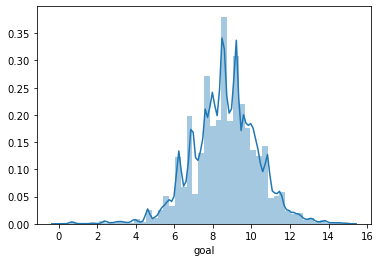

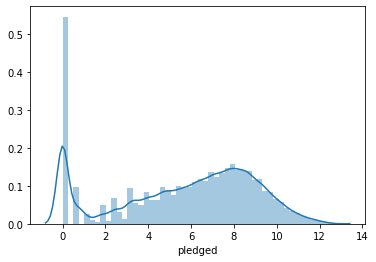

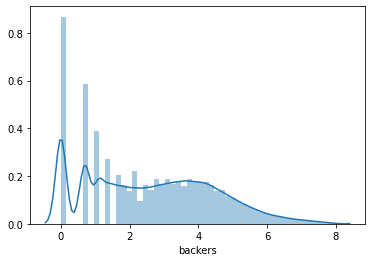

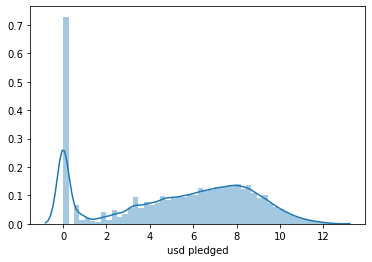

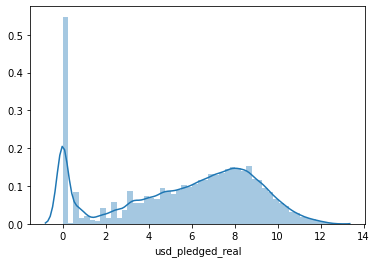

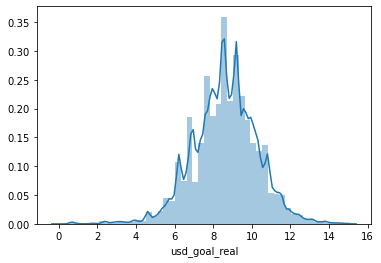

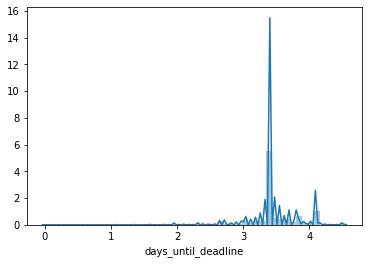

In [10]:
for col in numerical_cols:
    sns.distplot(df_no_outliers[col])
    plt.show()

### Drop redundant/irrelevant columns

In [11]:
df_no_outliers.drop(['category', 'currency', 'deadline', 'launched'], axis = 1, inplace = True)
df_no_outliers.head()

C:\Users\Ji Ho\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days_until_deadline
0,Publishing,6.908755,0.000000,0,0.000000,GB,0.000000,0.000000,7.336253,4.077537
1,Film & Video,10.308986,7.792349,0,2.772589,US,4.615121,7.792349,10.308986,4.094345
2,Film & Video,10.714440,5.398163,0,1.386294,US,5.398163,5.398163,10.714440,3.806662
3,Music,8.517393,0.693147,0,0.693147,US,0.693147,0.693147,8.517393,3.401197
4,Film & Video,9.878221,7.157735,0,2.708050,US,7.157735,7.157735,9.878221,4.025352


In [12]:
df_no_outliers.reset_index(drop = True, inplace  = True)

### Encode categorical features

In [13]:
categorical_columns = df_no_outliers.select_dtypes('object')

In [14]:
categorical = pd.get_dummies(categorical_columns)
categorical.head()

,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Scale features

In [15]:
numerical = df_no_outliers[numerical_cols]
y = df_no_outliers['state']
numerical.head()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,days_until_deadline
0,6.908755,0.000000,0.000000,0.000000,0.000000,7.336253,4.077537
1,10.308986,7.792349,2.772589,4.615121,7.792349,10.308986,4.094345
2,10.714440,5.398163,1.386294,5.398163,5.398163,10.714440,3.806662
3,8.517393,0.693147,0.693147,0.693147,0.693147,8.517393,3.401197
4,9.878221,7.157735,2.708050,7.157735,7.157735,9.878221,4.025352


In [16]:
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [17]:
X = pd.DataFrame(numerical_scaled, columns = numerical_cols)

In [18]:
X = pd.concat([X, categorical], axis = 1)

In [19]:
X.head()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,days_until_deadline,main_category_Art,main_category_Comics,main_category_Crafts,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,-1.014994,-1.748513,-1.420382,-1.595059,-1.750999,-0.769542,1.582675,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.991278,0.628124,0.081841,-0.211511,0.631249,1.011618,1.625842,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.230512,-0.102094,-0.669271,0.023234,-0.100693,1.254552,0.886965,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.065833,-1.537105,-1.044826,-1.387263,-1.539092,-0.061843,-0.154425,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.737109,0.434570,0.046873,0.550729,0.437237,0.753518,1.448642,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Split data into train and test sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [21]:
X_train.to_csv('data/train_test/X_train.csv')
X_test.to_csv('data/train_test/X_test.csv')
y_train.to_csv('data/train_test/y_train.csv')
y_test.to_csv('data/train_test/y_test.csv')